# CS178 LAB 3 WINTER 2017
# KODY CHEUNG 85737824

### PROBLEM 1: DECISION TREES

#### 1A) Entropy of y
![](entropy.png)

#### 1B) Information gain for xi, i = 1,2,3,4,5

![](information gain.png)
x<sub>1</sub> = 0.97095 - 0.9245 = 0.0465 

</br>

x<sub>2</sub> = 0.97095 - 0.3609 = 0.6101 

</br>

x<sub>3</sub> = 0.97095 - 0.9651 = 0.0059 

</br>

x<sub>4</sub> = 0.97095 - 0.8797 = 0.0913 

</br>

x<sub>5</sub> = 0.97095 - 0.9651 = 0.0059 

</br>

**When each feature is subtracted from the entropy of y, we can see that x<sub>2</sub> has the largest difference and most information gain and therefore should be used to split the data.**

#### 1C) Decision tree


![](decision tree.png)



### PROBLEM 2: Kaggle Decision Trees

#### 2A) Load training data

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml


X_data = np.genfromtxt("C:\Python35\CS178\Lab4\X_train.txt",delimiter=None)
Y_data = np.genfromtxt("C:\Python35\CS178\Lab4\Y_train.txt",delimiter=None)

# First 10,000 points are for training, second 10,000 are for validation
X_train = X_data[0:10000]
X_valid = X_data[10000:20000]

Y_train = Y_data[0:10000]
Y_valid = Y_data[10000:20000]

#### 2B) Learn decision tree classifier

In [78]:
from sklearn.metrics import mean_squared_error

# tree classifier
learner = ml.dtree.treeClassify(X_train, Y_train, maxDepth = 50)


# Calculate predicted training and validation error rates

Yhat_Train = learner.predict(X_train)
mse = mean_squared_error(Y_train, Yhat_Train)

Yhat_Validation = learner.predict(X_valid)
mse_valid = mean_squared_error(Y_valid, Yhat_Validation)


print("Training MSE of Depth 50: {}      Validation MSE of Depth 50: {}\n".format(mse,mse_valid))


Training MSE of Depth 50: 0.0047      Validation MSE of Depth 50: 0.3785



#### 2C) Test max depths 0-15

Training MSE of Depth 0 : 0.3418      Validation MSE of Depth 0 : 0.3419
Training MSE of Depth 1 : 0.3418      Validation MSE of Depth 1 : 0.3419
Training MSE of Depth 2 : 0.3223      Validation MSE of Depth 2 : 0.3191
Training MSE of Depth 3 : 0.3133      Validation MSE of Depth 3 : 0.3126
Training MSE of Depth 4 : 0.3105      Validation MSE of Depth 4 : 0.3152
Training MSE of Depth 5 : 0.3008      Validation MSE of Depth 5 : 0.3102
Training MSE of Depth 6 : 0.2949      Validation MSE of Depth 6 : 0.3103
Training MSE of Depth 7 : 0.2872      Validation MSE of Depth 7 : 0.312
Training MSE of Depth 8 : 0.277       Validation MSE of Depth 8 : 0.3124
Training MSE of Depth 9 : 0.2635      Validation MSE of Depth 9 : 0.3182
Training MSE of Depth 10: 0.246       Validation MSE of Depth 10: 0.3264
Training MSE of Depth 11: 0.2308      Validation MSE of Depth 11: 0.3257
Training MSE of Depth 12: 0.2093      Validation MSE of Depth 12: 0.3326
Training MSE of Depth 13: 0.1924      Validation MSE

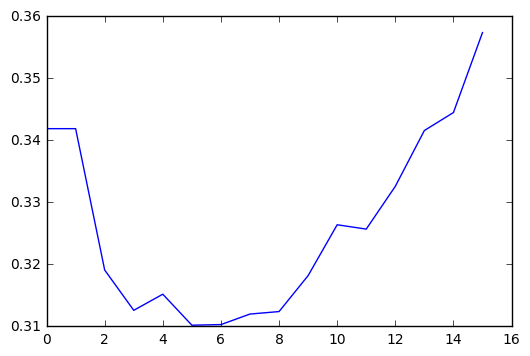

In [79]:
valid = []
for i in range(0,16):
    
    
    small_learner = ml.dtree.treeClassify(X_train, Y_train, maxDepth = i)
    Yhat_tr = small_learner.predict(X_train)
    tr_mse = mean_squared_error(Y_train, Yhat_tr)
    
    
    Yhat_val = small_learner.predict(X_valid)
    val_mse = mean_squared_error(Y_valid, Yhat_val)
    valid.append(val_mse)

    print("Training MSE of Depth {:<2}: {:<6}      Validation MSE of Depth {:<2}: {}".format(i, tr_mse, i, val_mse))

    
plt.plot(list(range(0,16)), valid)
plt.show()

The training error slowly decreases as the validation error goes from underfitting, to fitting, to overfitting.  The complexity starts out low and steadily increases with each depth.  The overfitting starts right after depth 7.  I would choose depth 6 as the best depth because of its minimum point on the error graph.

#### 2D) Minleaf depth

Training MSE with minLeaf 4   : 0.0966    Validation MSE with minLeaf 4   : 0.3815
Training MSE with minLeaf 8   : 0.1692    Validation MSE with minLeaf 8   : 0.3756
Training MSE with minLeaf 16  : 0.2263    Validation MSE with minLeaf 16  : 0.3563
Training MSE with minLeaf 32  : 0.2637    Validation MSE with minLeaf 32  : 0.3335
Training MSE with minLeaf 64  : 0.2899    Validation MSE with minLeaf 64  : 0.3276
Training MSE with minLeaf 128 : 0.3012    Validation MSE with minLeaf 128 : 0.3119
Training MSE with minLeaf 256 : 0.3085    Validation MSE with minLeaf 256 : 0.3172
Training MSE with minLeaf 512 : 0.3135    Validation MSE with minLeaf 512 : 0.3127
Training MSE with minLeaf 1024: 0.3223    Validation MSE with minLeaf 1024: 0.3191
Training MSE with minLeaf 2048: 0.3418    Validation MSE with minLeaf 2048: 0.3419
Training MSE with minLeaf 4096: 0.3418    Validation MSE with minLeaf 4096: 0.3419


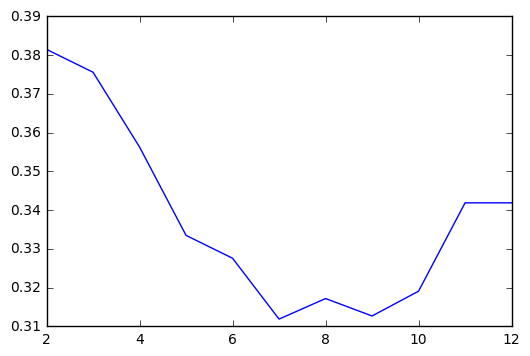

In [80]:
error = []
for i in range(2,13):
    
    min_learner = ml.dtree.treeClassify(X_train,Y_train, maxDepth = 50, minLeaf = 2**i)
    
    Yhat_tr = min_learner.predict(X_train)
    
    tr_mse = mean_squared_error(Y_train, Yhat_tr)
    
    Yhat_val = min_learner.predict(X_valid)

    val_mse = mean_squared_error(Y_valid, Yhat_val)
    
    error.append(val_mse)

    print("Training MSE with minLeaf {:<4}: {:<6}    Validation MSE with minLeaf {:<4}: {}".format(2**i, tr_mse, 2**i, val_mse))
    
    
plt.plot(list(range(2,13)), error)
plt.show()

The complexity increases as the number of minLeafs double, going from underfitting to best fit to overfitting like maxDepth does. I would use a minLeaf of 128 for its best validation error rate.

#### 2E) A related control is minParent: how does this complexity control with minParent compare to minLeaf?

minParent is the minimum number of data required to split a node, while minLeaf is the minimum number of data required to form a node, and they both have similar validation error rates, where the model underfits, fits, then overfits.

#### 2F) ROC curve of Area Under the Curve

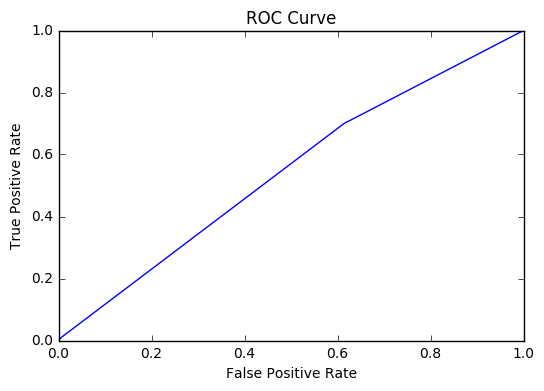

Area under the curve: 0.5839253180793494


In [81]:
#roc member function

false_positive, true_positive, true_negative = learner.roc(X_valid, Y_valid)

plt.plot(false_positive, true_positive)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#auc member function

print("Area under the curve: {}".format(learner.auc(X_valid, Y_valid)))


#### 2G) Predictions on test points

In [82]:
X_test = np.genfromtxt("C:\Python35\CS178\Lab4\X_test.txt",delimiter=None)

best_learner = ml.dtree.treeClassify(X_data, Y_data, maxDepth = 50, minLeaf = 128)

Y_predictions = best_learner.predictSoft(X_test)

# false_positive, true_positive, true_negative = best_learner.roc(X_valid, Y_valid)

# plt.plot(false_positive, true_positive)
# plt.title("ROC Curve")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.show()


np.savetxt('Yhat_dtree.txt', np.vstack( (np.arange(len(Y_predictions)), Y_predictions[:,1]) ).T, 
           '%d, %.2f', header = 'ID,Prob1', comments = '', delimiter=',')


This prediction resulted in a score of 0.68793 on Kaggle, and is much higher than the 0.57492 from the validation data.

### PROBLEM 3: Random Forests

#### 3A) Bagged Ensemble

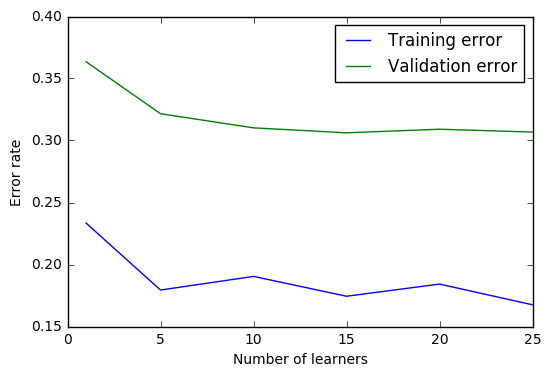

In [83]:
# Build ensemble members

M,N = X_train.shape

learners = [1, 5, 10, 15, 20, 25]


# ensemble of classifiers
ensemble = [None] * 25

for i in range(0, 25):
    #ml.bootstrapData(X_train, Y_train, n_boot = nBag)
    
    indices = np.floor(M * np.random.rand(M)).astype(int)    # random combo of M rows
    
    Xi, Yi = X_train[indices,:], Y_train[indices]            # X and Y indices of those rows
    
    ensemble[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth = 15, minLeaf = 4, nFeatures = 8) # put the learners in the ensemble


# Compute prediction of the ensemble
spaces = X_train.shape[0]
tr = np.zeros((spaces,25))
val = np.zeros((spaces,25))

training_err = []
validation_err = []

# create prediction list for each learner
for i in range(0,25):
    tr[:,i] = ensemble[i].predict(X_train)
    val[:,i] = ensemble[i].predict(X_valid)

# calculate x number of learners from the ensemble and plot their error rates
for bags in learners:

    tr_err = np.mean(Y_train != (np.mean(tr[:,:bags], axis=1) > 0.5 ))
    
    training_err.append(tr_err)

    val_err = np.mean(Y_valid != (np.mean(val[:,:bags], axis=1) > 0.5 ))
    
    validation_err.append(val_err)

plt.plot(learners, training_err, label = "Training error")
plt.plot(learners, validation_err, label = "Validation error")
plt.xlabel("Number of learners")
plt.ylabel("Error rate")
plt.legend()
plt.show()


### 3B) Ensemble on Test Data

In [ ]:
# make ensemble and predict on test data
m,n = X_test.shape

Test = X_test.shape[0]

# ensemble of classifiers
bags = 200
full_ensemble = [None] * bags

for i in range(0, bags):
    #ml.bootstrapData(X_train, Y_train, n_boot = nBag)
    
    indices = np.floor(m * np.random.rand(m)).astype(int)    # random combo of M rows
    
    Xi, Yi = X_data[indices,:], Y_data[indices]            # X and Y indices of those rows
    
    # put the learners in the ensemble
    full_ensemble[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth = 15, minLeaf = 4, nFeatures = 8) 
    
# space for predictions from each model
predict = np.zeros((Test,2))

# predictions = np.zeros((25,2))
# print(predictions)
# for i in range(0,25):
#     predictions[i] = np.zeros((Test,2))

for i in range(0,bags):
    
#     predict[:,i] = 
    predict += full_ensemble[i].predictSoft(X_test)

predict = predict/bags


np.savetxt('Yhat_ensemble.txt', np.vstack( (np.arange(len(predict)), predict[:,1]) ).T, 
           '%d, %.2f', header = 'ID,Prob1', comments = '', delimiter=',')


The performance of 100 learners in the ensemble and taking the average of soft scores resulted in a score of 0.74794.